In [26]:
import numpy as np
import pandas as pd
import seaborn as  sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('StudentsPerformance.csv')

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [15]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [16]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [17]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
for column in df.columns:
    print(f"categories in {column}  variable:   ",end=" ")
    print(df[f'{column}'].unique())

categories in gender  variable:    ['female' 'male']
categories in race/ethnicity  variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
categories in parental level of education  variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in lunch  variable:    ['standard' 'free/reduced']
categories in test preparation course  variable:    ['none' 'completed']
categories in math score  variable:    [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
categories in reading score  variable:    [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  3

In [19]:
numeric_feature= [ feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature= [ feature for feature in df.columns if df[feature].dtype == 'O']

print("we have {} numerical feature: {}".format(len(numeric_feature),numeric_feature))
print("we have {} categorical feature: {}".format(len(categorical_feature),categorical_feature))

we have 3 numerical feature: ['math score', 'reading score', 'writing score']
we have 5 categorical feature: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [20]:
df['average_score']=(df['math score']+df['writing score']+df['reading score'])/3

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<Axes: xlabel='average_score', ylabel='Count'>

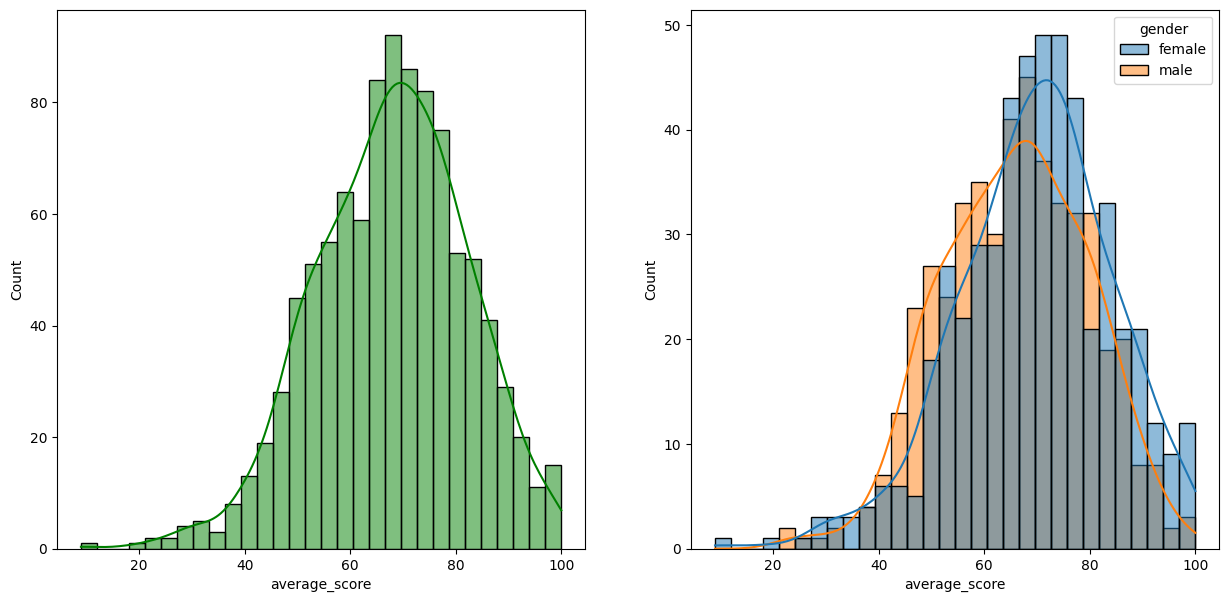

In [28]:
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='gender')
